In [4]:
import numpy as np
from matplotlib import pyplot as plt

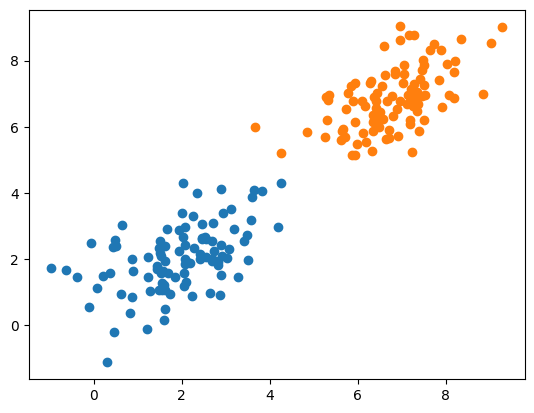

In [204]:
class_0 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], size=100)
class_1 = np.random.multivariate_normal([7, 7], [[1, 0.5], [0.5, 1]], size=100)

plt.scatter(*class_0.T)
plt.scatter(*class_1.T)

In [212]:
def predict(point, classes):
    total_len = np.sum([x.shape[0] for x in classes])

    priors = [len(x) / total_len for x in classes]

    means = [x.mean(axis=0) for x in classes]
    vars = [x.var(axis=0) for x in classes]

    prob_classes = []
    for class_idx, c in enumerate(classes):
        prob_features = []
        for feature_idx, feature in enumerate(point):
            prob_feature =  1 / np.sqrt(2 * np.pi * vars[class_idx][feature_idx]) *  np.exp(-(point[0] - means[class_idx][feature_idx]) ** 2 / (2 * vars[class_idx][feature_idx]))
            prob_features.append(prob_feature)

        prob_classes += [sum(prob_features)]
        
    return np.argmax(prob_classes)

In [225]:
xx, yy = np.meshgrid(np.linspace(class_0.T[0].min(), class_1.T[0].max(), num=10),
                     np.linspace(class_0.T[1].min(), class_1.T[1].max(), num=10))

# colors = [int(i % 23) for i in xy[0]]


flat_x = xx.flatten()
flat_y = yy.flatten()

In [226]:
predictions = np.array([predict([x, y], [class_0, class_1]) for x, y in zip(flat_x, flat_y)])

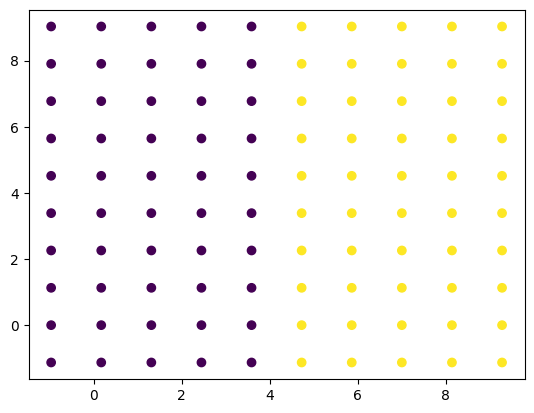

In [228]:
plt.scatter(flat_x, flat_y, c=predictions)

In [230]:
predictions = np.array([predict([x, y], [class_0, class_1]) for x, y in zip(class_0, class_1)])

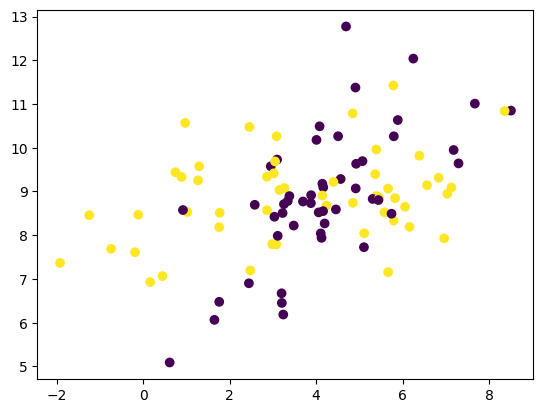

In [235]:
plt.scatter(class_0.T[0] + class_0.T[0], class_0.T[1] + class_1.T[1], c=predictions)

In [233]:
list(zip(class_0, class_1))

[(array([3.48150486, 2.70889599]), array([4.25715295, 5.21794485])),
 (array([2.45863232, 2.63012794]), array([6.50035699, 6.43998862])),
 (array([1.93983322, 2.88797781]), array([4.85515213, 5.84503377])),
 (array([2.79072775, 1.92928518]), array([7.91392064, 6.59456427])),
 (array([1.63356454, 1.93264121]), array([7.1999747 , 7.14728879])),
 (array([-0.62391457,  1.66740046]), array([6.41301997, 6.791223  ])),
 (array([2.42386585, 2.13409634]), array([8.34222132, 8.64966401])),
 (array([0.44308932, 2.36758101]), array([5.3509929 , 6.96556264])),
 (array([2.22948033, 0.88731659]), array([7.4581913 , 7.70259191])),
 (array([2.04057782, 4.30266776]), array([7.18505676, 6.18777977])),
 (array([0.63426887, 0.92961897]), array([7.90061095, 8.32460221])),
 (array([1.84839504, 1.46300435]), array([7.02346283, 7.30833007])),
 (array([1.2393428 , 2.05450631]), array([5.85983903, 5.13953721])),
 (array([1.7414933 , 0.93074723]), array([7.27216035, 7.29027403])),
 (array([1.54873583, 1.27875744]